In [1]:
import tensorflow as tf
import os

In [2]:
#标准模式，高效利用gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
tf.config.list_physical_devices('GPU') #whether or nor available in gpu

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Remove dodgy images

In [47]:
import cv2
import imghdr

In [48]:
data_dir='data'

In [49]:
image_exts=['jpeg','jpg','bmp','png']

去除格式不是以上四种

In [7]:
for image_class in os.listdir(data_dir):
       for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            

Image not in ext listdata/happy/.DS_Store


NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

In [50]:
import numpy as np
from matplotlib import pyplot as plt

In [51]:
data = tf.keras.utils.image_dataset_from_directory('data')
#可直接读取目录中的数据作为dataset


Found 59 files belonging to 3 classes.


In [52]:
data_iterator = data.as_numpy_iterator()

In [53]:
batch = data_iterator.next()

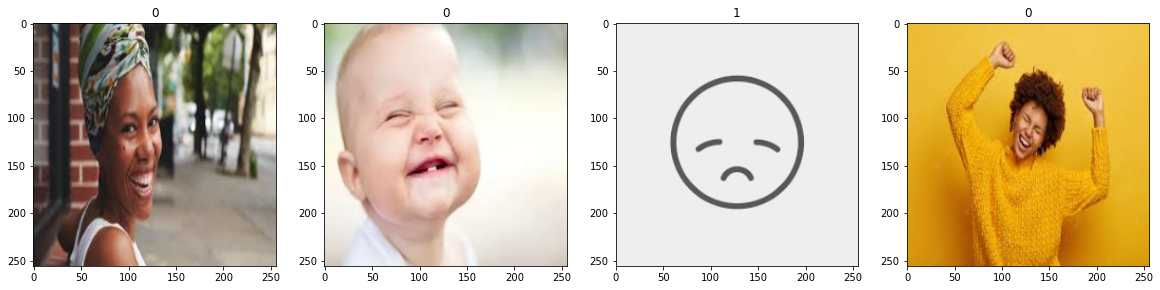

In [54]:
fig,ax = plt.subplots(ncols = 4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#scale Date

In [57]:
data = data.map(lambda x,y:(x/255,y))
data.as_numpy_iterator().next()

(array([[[[8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          [8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          [8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          ...,
          [8.9512867e-01, 9.3406099e-01, 9.5221353e-01],
          [8.9803922e-01, 9.3681830e-01, 9.4597119e-01],
          [8.9803922e-01, 9.3725491e-01, 9.4509804e-01]],
 
         [[8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          [8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          [8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          ...,
          [8.9512867e-01, 9.3406099e-01, 9.5221353e-01],
          [8.9803922e-01, 9.3681830e-01, 9.4597119e-01],
          [8.9803922e-01, 9.3725491e-01, 9.4509804e-01]],
 
         [[8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          [8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          [8.6666667e-01, 9.0588236e-01, 9.1372550e-01],
          ...,
          [8.9512867e-01, 9.3406099e-01, 9.5221353e-01],
          [8.9803922e-01, 9.3681830e-

In [ ]:
#Split Data

In [58]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [32]:
val_size

0

In [59]:
train = data.take(train_size)
val =data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build deep learning model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [61]:
model =Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [62]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

Train

In [63]:
logdir='logs'

In [64]:
import tensorboard


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [65]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


2022-10-22 14:00:13.381514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 905ms/step - loss: 0.6808 - accuracy: 0.5312
Epoch 2/20
1/1 [==============================] - 0s 180ms/step - loss: 1.6246 - accuracy: 0.4375
Epoch 3/20
1/1 [==============================] - 0s 132ms/step - loss: 2.6888 - accuracy: 0.4375
Epoch 4/20
1/1 [==============================] - 0s 135ms/step - loss: 1.4221 - accuracy: 0.4375
Epoch 5/20
1/1 [==============================] - 0s 129ms/step - loss: 0.6313 - accuracy: 0.6562
Epoch 6/20
1/1 [==============================] - 0s 130ms/step - loss: 0.7116 - accuracy: 0.4062
Epoch 7/20
1/1 [==============================] - 0s 128ms/step - loss: 0.6558 - accuracy: 0.4688
Epoch 8/20
1/1 [==============================] - 0s 129ms/step - loss: 0.6594 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 130ms/step - loss: 0.6512 - accuracy: 0.5312
Epoch 10/20
1/1 [==============================] - 0s 129ms/step - loss: 0.6326 - accuracy: 0.8125
Epoch 11/20
1/1 [=============

Plot Performance

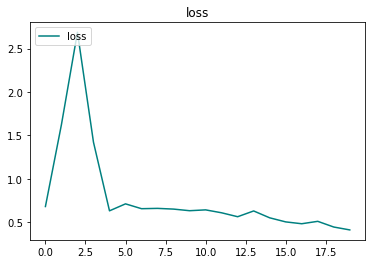

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.title('loss')
plt.legend(loc='upper left')
plt.show()

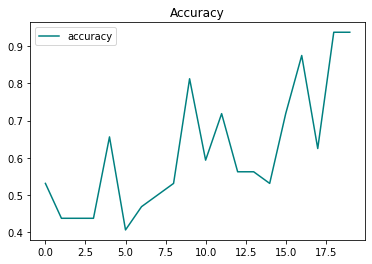

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.title('Accuracy')
plt.legend(loc='upper left')
plt.show()

Evaluate

In [68]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy


In [69]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [70]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict()
    pre.update_state(y,yhat)
    re.updata_state(y,yhat)
    acc.update_state(y,hat)

In [71]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


Test

In [72]:
import cv2

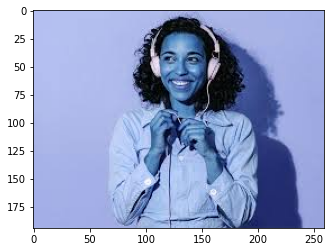

In [77]:
img =cv2.imread('/Users/sampson/Desktop/800/nicho_course_tensorflow/tensorflow CV/data/test/images.jpg')
plt.imshow(img)
plt.show()

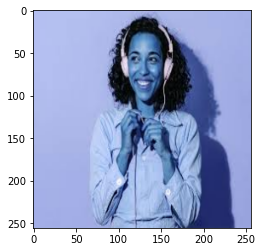

In [78]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
yhat = model.predict(np.expand_dims(resize/255,0))

2022-10-22 14:05:52.444983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 703ms/step


In [81]:
yhat

array([[0.9370881]], dtype=float32)

In [82]:
if yhat>0.5:
    print('class is sad')
else:
    print('class is happy')

class is sad


save model

In [83]:
from tensorflow.keras .models import load_model

In [90]:
model.save(os.path.join('models','imageclassifier.h5'))


In [92]:
new_model = load_model('/Users/sampson/Desktop/800/nicho_course_tensorflow/tensorflow CV/models/imageclassifier.h5')


In [94]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 83ms/step


2022-10-22 14:12:55.926561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.9370881]], dtype=float32)